In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
print(os.getcwd())   

print("✅ All libraries imported successfully!")
print("📋 Ready to build Tree Recommendation System")

c:\Users\Dell\Desktop\CAPSTONE ML\notebooks
✅ All libraries imported successfully!
📋 Ready to build Tree Recommendation System


In [ ]:
# Load your dataset
df = pd.read_csv(r"C:\ReForest\reforestadmin\data\tree_seedling_datasets.csv", encoding='latin1')# Basic data exploration
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nStatistical summary:")
print(df.describe())

Dataset shape: (26, 6)

First few rows:
  Common Name           Scientific Name  \
0    Lansones        Lansium Domesticom   
1      Marang  Artocarpus odoratissimus   
2      Santol       Sandoricum koetjape   
3       Guava           Psidium guajava   
4      Molave          Vitex parviflora   

                                          Soil Type Soil Moisture pH Range  \
0  Well-drained, sandy loam, rich in organic matter        15-25%  5.56.5   
1             Deep, fertile, well-drained clay loam        35-45%  5.56.5   
2             Sandy loam to clay loam, well-drained     20  35 %  5.06.5   
3      Adaptable, prefers sandy loam, good drainage     15  25 %  4.57.0   
4                Dry, well-drained, limestone soils     10  20 %  6.07.5   

  Temperature   
0     2235 °C  
1     2432 °C  
2     2232 °C  
3     2030 °C  
4     2232 °C  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column     

In [ ]:
import pandas as pd
import numpy as np
import re

# Choose your feature columns (inputs from sensors)
moisture_col = "Soil Moisture"
ph_col = "pH Range"
temp_col = "Temperature "   # note the trailing space in your CSV

# Target column (tree type you want to recommend)
target_col = "Common Name"

# --- Helper function to clean numeric/ordinal values ---
def parse_numeric_value(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float, np.integer, np.floating)):
        return float(x)

    s = str(x).strip().lower()
    # Map qualitative words to numbers
    ordinal_map = {
        "very low": 1, "low": 2, "medium": 3, "moderate": 3, 
        "high": 4, "very high": 5,
        "dry": 2, "moist": 4, "wet": 5
    }
    if s in ordinal_map:
        return float(ordinal_map[s])

    # Extract numbers from ranges like "5.5–7.0" or "22-30 C"
    nums = re.findall(r"-?\d+\.?\d*", s)
    if len(nums) == 0:
        return np.nan
    nums = [float(n) for n in nums]
    return float(np.mean(nums))  # take midpoint if it's a range

# Apply parsing to your dataset
X = pd.DataFrame({
    moisture_col: df[moisture_col].apply(parse_numeric_value),
    ph_col: df[ph_col].apply(parse_numeric_value),
    temp_col: df[temp_col].apply(parse_numeric_value),
})

y = df[target_col].astype(str)  # make sure target is string labels

print("Features preview:")
print(X.head())
print("\nTarget preview:")
print(y.head())


Features preview:
   Soil Moisture  pH Range  Temperature 
0           -5.0      6.00          28.5
1           -5.0      6.00          28.0
2           27.5      5.75          27.0
3           20.0      5.75          25.0
4           15.0      6.75          27.0

Target preview:
0    Lansones
1      Marang
2      Santol
3       Guava
4      Molave
Name: Common Name, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
print("Train accuracy:", rf.score(X_train, y_train))
print("Test accuracy:", rf.score(X_test, y_test))


Train accuracy: 1.0
Test accuracy: 0.0


              precision    recall  f1-score   support

       Agoho       0.00      0.00      0.00       1.0
        Akli       0.00      0.00      0.00       0.0
     Avocado       0.00      0.00      0.00       0.0
     Caimito       0.00      0.00      0.00       1.0
    Lansones       0.00      0.00      0.00       1.0
     Lanutan       0.00      0.00      0.00       0.0
    Mahogany       0.00      0.00      0.00       0.0
      Manggo       0.00      0.00      0.00       1.0
      Marang       0.00      0.00      0.00       0.0
  Pangantoon       0.00      0.00      0.00       1.0
    Pili Nut       0.00      0.00      0.00       1.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



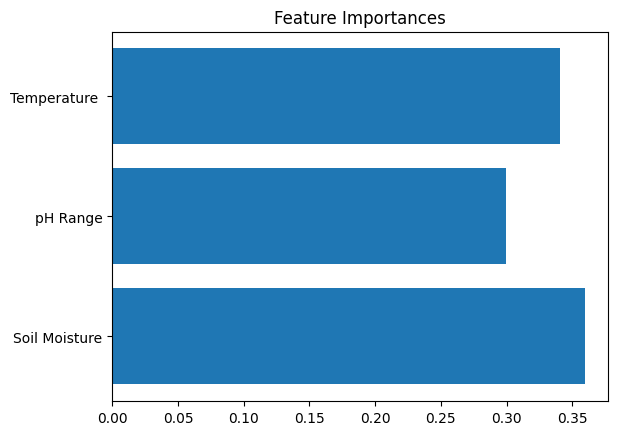

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

importances = rf.feature_importances_
plt.barh([moisture_col, ph_col, temp_col], importances)
plt.title("Feature Importances")
plt.show()


In [17]:
import joblib

joblib.dump(rf, "tree_recommender_rf.pkl")
print("Model saved as tree_recommender_rf.pkl")


Model saved as tree_recommender_rf.pkl


In [18]:
import joblib
import pandas as pd

# Load the trained model
rf = joblib.load("tree_recommender_rf.pkl")

# Define same feature names used in training
moisture_col = "Soil Moisture"
ph_col = "pH Range"
temp_col = "Temperature "

# Example sensor readings (ilisan nimo sa actual values gikan sa sensors)
sensor_data = {
    moisture_col: 25.0,   # Soil moisture (%)
    ph_col: 6.5,          # pH value
    temp_col: 28.0        # Temperature (°C)
}

# Convert to DataFrame
X_new = pd.DataFrame([sensor_data])

# Predict
prediction = rf.predict(X_new)[0]
proba = rf.predict_proba(X_new)[0]

print("🌱 Recommended tree:", prediction)
print("\n📊 Class probabilities:")
for tree, p in zip(rf.classes_, proba):
    print(f"{tree}: {p:.3f}")


🌱 Recommended tree: Nangka

📊 Class probabilities:
Akli: 0.045
Atis: 0.005
Avocado: 0.000
Banaba: 0.215
Bangkál: 0.000
Bani: 0.010
Cacao: 0.005
Dao: 0.000
Guava: 0.000
Guyabano: 0.135
Lanutan: 0.045
Lemonsito: 0.050
Lomboy: 0.175
Mahogany: 0.005
Marang: 0.065
Molave: 0.005
Nangka: 0.220
Narra: 0.005
Rambutan: 0.005
Santol: 0.010


In [ ]:
import joblib

joblib.dump(rf, "tree_recommender_rf.pkl")
print("Model saved as tree_recommender_rf.pkl")


Model saved as tree_recommender_rf.pkl


In [ ]:
import joblib
import pandas as pd

rf = joblib.load("tree_recommender_rf.pkl")

moisture_col = "Soil Moisture"
ph_col = "pH Range"
temp_col = "Temperature "

sensor_data = {
    moisture_col: 25.0,   # example soil moisture %
    ph_col: 6.5,          # example pH
    temp_col: 28.0        # example temperature °C
}

X_new = pd.DataFrame([sensor_data])

prediction = rf.predict(X_new)[0]
proba = rf.predict_proba(X_new)[0]

print("🌱 Recommended tree:", prediction)


🌱 Recommended tree: Nangka


In [21]:
import numpy as np

classes = rf.classes_
top_idx = np.argsort(proba)[::-1]
top_classes = classes[top_idx][:3]
top_scores = proba[top_idx][:3]

print("\n🌱 Top 3 recommended trees:")
for tree, score in zip(top_classes, top_scores):
    print(f"{tree}: {score:.3f}")



🌱 Top 3 recommended trees:
Nangka: 0.220
Banaba: 0.215
Lomboy: 0.175


In [ ]:
# Variables para sa sensor readings (ilisan kung naa nay actual readings)
moisture_value = 30.0       # % soil moisture
ph_value = 6.8              # pH level
temperature_value = 27.0    # °C

# Format into dict (same column names as dataset)
sensor_data = {
    "Soil Moisture": moisture_value,
    "pH Range": ph_value,
    "Temperature ": temperature_value
}

# Convert to DataFrame
X_new = pd.DataFrame([sensor_data])

# Predict with RF model
prediction = rf.predict(X_new)[0]
proba = rf.predict_proba(X_new)[0]

print("🌱 Recommended tree:", prediction)

# Show Top 3 matches
import numpy as np
classes = rf.classes_
top_idx = np.argsort(proba)[::-1]
top_classes = classes[top_idx][:3]
top_scores = proba[top_idx][:3]

print("\n🌱 Top 3 recommended trees:")
for tree, score in zip(top_classes, top_scores):
    print(f"{tree}: {score:.3f}")


🌱 Recommended tree: Nangka

🌱 Top 3 recommended trees:
Nangka: 0.345
Lanutan: 0.185
Mahogany: 0.120
